In [43]:
#https://jovian.ai/ashutoshnemani3/tmdb-movie-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os

In [4]:
os.chdir("E:\\PYTHON NOTES\\EDA\\tmdb data")

In [5]:
pd.set_option("display.max_columns",100)

In [6]:
sns.set_style("darkgrid")

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import datetime

In [9]:
import missingno as msno

In [10]:
df=pd.read_csv("tmdb_movies.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [14]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
df.columns[df.isna().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

In [16]:
#drop duplicate
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [17]:
type(df.release_date[0])

str

In [18]:
df.drop(columns=["imdb_id","homepage","tagline","overview","keywords"],inplace=True,axis=1)

In [19]:
##Convert releasedate from string format to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
type(df.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

Now we have completed the data wrangling by dropping the not required columns and removing duplicate values.

# Exploratory Data Analysis

## Some Questions we want to answer by this analysis:

1. Which genres movies are more popular?
2. Which genres movies are usually the longest and shortest/
3. Do more popular movies usually fall in high bracket?
4. Have longer movies been more popular than the shorter ones?
5. Did longer movies have higher average vote ratings from 1960 to 2015?
6. Do movies having higher budget more popular than movies with lower budget?
7. What was the proportion of movies for each genre from 1960 to 2015?
8. Get the top 10 actors who have acted in most movies from 1960 to 2015.
9. Get the top 10 movies with avergae vote ratings.
10. Get the top 10 movies with popularity.
11. Get the top 10 directors with max Popularity.
12. From 1960 to 2015,in total which was the favourite month for producers to release their movies?

In [21]:
df.to_csv('movie_data_modified.csv',index=False)

In [22]:
df = pd.read_csv('movie_data_modified.csv')
df['release_date'] = pd.to_datetime(df['release_date'])

# What genre movies are more popular?

In [23]:
df["genres"].value_counts()

Drama                                              712
Comedy                                             712
Documentary                                        312
Drama|Romance                                      289
Comedy|Drama                                       280
                                                  ... 
Romance|War|Documentary|Drama                        1
Action|Adventure|Horror|Science Fiction|Foreign      1
Horror|Thriller|Fantasy|Mystery                      1
Animation|Adventure|Family|Comedy                    1
Western|Comedy|Drama|Music                           1
Name: genres, Length: 2039, dtype: int64

In [24]:
def splitbyseperator(column,seprator):
    return column.str.split(seprator,expand=True)

In [25]:
## create a copy of genre
df_copy_genre = df.copy()

In [26]:
## split then genre column and convert it to an array 
## eg 'Action|Thriller|Horror' = ['Action','Thriller','Horror']

In [27]:
df_copy_genre["genres"]=df_copy_genre["genres"].str.split("|")

In [28]:
## Now we use explode function
## to give each genre its individual row

In [29]:
df_genre_multiple=df_copy_genre.explode("genres")

In [30]:
df_genre_multiple.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [31]:
df_genre = df_genre_multiple[['popularity', 'genres','release_year']]
df_genre.shape

(26978, 3)

In [32]:
##group by genre and get popularity
df_genre_grouped = df_genre_multiple.groupby(['release_year','genres']).popularity.mean()
df_genre_grouped

release_year  genres         
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Crime              0.346480
              Drama              0.566305
                                   ...   
2015          Science Fiction    2.245603
              TV Movie           0.260574
              Thriller           1.401877
              War                1.284511
              Western            3.178796
Name: popularity, Length: 1049, dtype: float64

In [33]:
genre_yearwise = df_genre_grouped.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [34]:
genre_yearwise

,,,popularity
release_year,release_year,genres,
1960,1960,Thriller,0.811910
1961,1961,Animation,2.631987
1962,1962,Adventure,0.942513
1963,1963,Animation,2.180410
1964,1964,War,0.930959
1965,1965,Music,0.968850
1966,1966,Animation,0.585717
1967,1967,Animation,1.348805
1968,1968,Mystery,1.519456


In [35]:
genre_yearwise.reset_index(level=2,inplace=True)

In [36]:
genre_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [37]:
genre = genre_yearwise.genres.value_counts()
genre

Adventure          14
Animation          10
Fantasy             8
Crime               5
War                 3
Action              3
Family              3
Science Fiction     2
Western             2
Music               2
Mystery             2
History             1
Thriller            1
Name: genres, dtype: int64

In [38]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

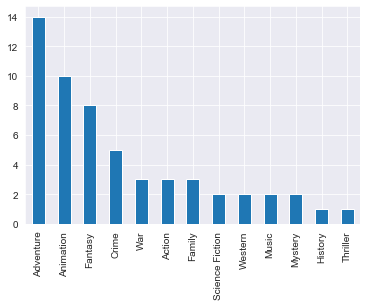

In [39]:
genre.plot.bar()

# What genre of movies have usually been longest?

In [40]:
runtime_genre= df_genre_multiple.groupby("genres").runtime.mean().sort_values()

In [41]:
runtime_genre

genres
Animation           68.181688
Family              89.603574
TV Movie            91.982036
Horror              94.424557
Comedy              96.745057
Science Fiction     99.419854
Fantasy            100.736900
Documentary        102.651923
Thriller           103.247678
Action             104.917785
Music              105.137255
Mystery            105.928395
Adventure          106.173351
Romance            106.891355
Crime              106.917282
Foreign            107.228723
Drama              110.478151
Western            117.575758
War                127.625926
History            136.206587
Name: runtime, dtype: float64

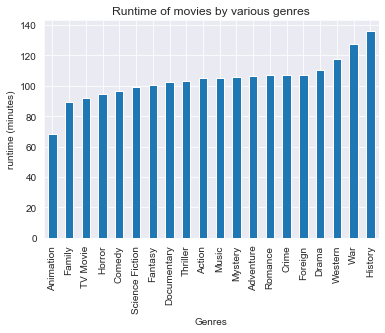

In [42]:
runtime_genre.plot.bar(title = 'Runtime of movies by various genres',xlabel='Genres',ylabel='runtime (minutes)');

# Results

#### By aggregate running time of various kind of genre movies we conclude that.

* <b>History</b> movies are usually the longest(>2 hours).
* War movies are the 2nd longest (>approx 2 hours)
* Animation movies are usually the shortest(around 70 minutes)
* Family,TV Movies and horror are usually the next shorter set of movies

# Do More popular movies usually fall in high revenue bracket?

In [43]:
def cut_into_quantile(dfname,column_name):
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]
    bin_names = ['Low','Medium','Moderately High','High']
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name],bin_edges,labels=bin_names,include_lowest=True)
    return dfname

In [47]:
df_non_zero_rev=df[df['revenue_adj']!=0]

In [48]:
df_data_revenue_bins = df_non_zero_rev[df_non_zero_rev['release_year'].isin([2010,2011,2012,2013,2014,2015])].copy()

In [49]:
df_data_revenue_quantile =  cut_into_quantile(df_data_revenue_bins,'revenue_adj')

In [68]:
revenue_frame = df_data_revenue_quantile.groupby(['release_year','revenue_adj_levels']).popularity.mean().to_frame()

In [70]:
revenue_frame.reset_index(level=0,inplace=True)

In [72]:
revenue_frame.reset_index(level=0,inplace=True)

In [73]:
revenue_frame

,revenue_adj_levels,release_year,popularity
0,Low,2010,0.366764
1,Medium,2010,0.694761
2,Moderately High,2010,0.949050
3,High,2010,2.129836
4,Low,2011,0.447365
5,Medium,2011,0.668268
6,Moderately High,2011,1.127403
7,High,2011,1.901019
8,Low,2012,0.387351
9,Medium,2012,0.643345


In [74]:
low_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Low'].popularity.tolist()


In [75]:
medium_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Medium'].popularity.tolist()
mod_high_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Moderately High'].popularity.tolist()
high_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'High'].popularity.tolist()

In [76]:
len(high_revenue_pop)
release_years = [2010,2011,2012,2013,2014,2015]

In [77]:
plotdata = pd.DataFrame({
    "Low": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately High": mod_high_revenue_pop,
    "High Revenue": high_revenue_pop
},index=release_years)

In [78]:
plotdata

,Low,Medium,Moderately High,High Revenue
2010,0.366764,0.694761,0.949050,2.129836
2011,0.447365,0.668268,1.127403,1.901019
2012,0.387351,0.643345,1.030772,2.540435
2013,0.473785,0.768774,1.253945,2.441978
2014,0.651162,1.116157,1.810027,4.492541
2015,0.613339,1.065398,2.004877,5.731442


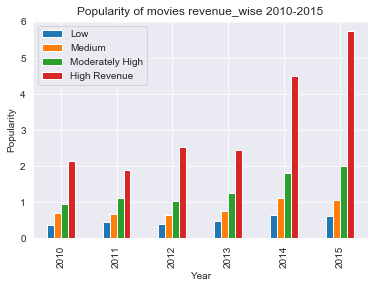

In [79]:
plotdata.plot(kind='bar')
plt.title('Popularity of movies revenue_wise 2010-2015')
plt.xlabel("Year")
plt.ylabel("Popularity");

In [80]:
release_year_latest = [2010,2011,2012,2013,2014,2015]

# Have longer movies been more popular than the shorter ones?

In [83]:
## running time bins
df_copy=df[df['release_year'].isin(release_year_latest)].copy()
df_copy = df_copy[df_copy['runtime'] != 900]
df_runtime_bins = cut_into_quantile(df_copy,'runtime')

In [84]:
df_copy[df_copy['runtime'] >= 400]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_levels
2169,367186,0.082894,0,0,The Pillars of the Earth,Ian McShane|Matthew Macfadyen|Eddie Redmayne|H...,Sergio Mimica-Gezzan,421,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,2010-07-23,22,7.3,2010,0.0,0.0,High
2213,189197,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,2010-05-16,183,7.8,2010,120000000.0,0.0,High
6007,222724,0.141918,0,0,Crystal Lake Memories: The Complete History of...,Corey Feldman,Daniel Farrands,400,Documentary,Hutson Ranch Media,2013-09-13,10,6.9,2013,0.0,0.0,High


In [85]:
popularitybyruntime = df_runtime_bins.groupby(['release_year','runtime_levels']).popularity.median().to_frame()
popularitybyruntime.reset_index(inplace=True)

In [86]:
short_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Low'].popularity.tolist()
medium_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Medium'].popularity.tolist()
mod_long_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Moderately High'].popularity.tolist()
long_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'High'].popularity.tolist()

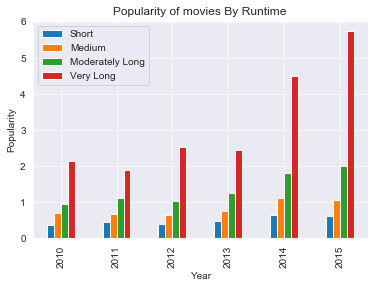

In [96]:
plotdata = pd.DataFrame({
    "Short": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately Long": mod_high_revenue_pop,
    "Very Long": high_revenue_pop
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Popularity");

In [103]:
vote_avgbyruntime = df_runtime_bins.groupby(['release_year','runtime_levels']).vote_average.mean().to_frame()

In [104]:
vote_avgbyruntime.reset_index(inplace=True)

In [106]:
vote_avgbyrunbins = vote_avgbyruntime[vote_avgbyruntime['release_year'].isin([2010,2011,2012,2013,2014,2015])].copy()

In [107]:
vote_avgbyruntime

,release_year,runtime_levels,vote_average
0,2010,Low,5.974590
1,2010,Medium,5.513084
2,2010,Moderately High,6.025373
3,2010,High,6.383333
4,2011,Low,5.839850
5,2011,Medium,5.602256
6,2011,Moderately High,6.081507
7,2011,High,6.288976
8,2012,Low,5.740580
9,2012,Medium,5.458757


In [108]:
### 
short_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Low'].vote_average.tolist()
medium_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Medium'].vote_average.tolist()
mod_long_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Moderately High'].vote_average.tolist()
long_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'High'].vote_average.tolist()

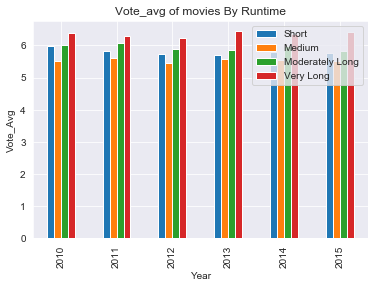

In [109]:
plotdata = pd.DataFrame({
    "Short": short_movie_vote,
    "Medium": medium_movie_vote,
    "Moderately Long": mod_long_movie_vote,
    "Very Long": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Vote_avg of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Vote_Avg");

# What was the proportion of each genre of movies from 1960 to 2015

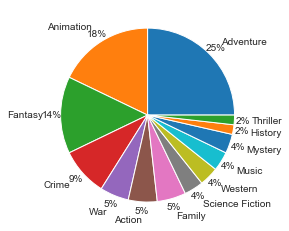

In [110]:
plt.pie(genre,labels=genre.index,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);